# **Image Processing with Python.**

# Exercise - 1:

**1. Read and display the image.**

*   Read the image using the Pillow library and display it.
*   You can also use matplotlib to display the image.

In [ ]:
#Importing Libraries

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

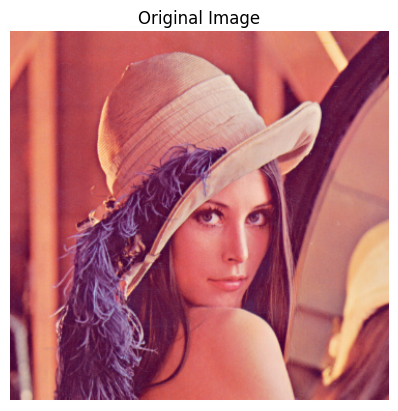

In [ ]:
#read and display image
image_path = Image.open("/content/drive/MyDrive/AI&ML --- Level 6 /AI&ML---Level6---Workshop/lenna_image.png")

plt.imshow(image_path)
plt.title("Original Image")
plt.axis("off")
plt.show()

**2. Display only the top left corner of 100x100 pixels.**

*   Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and Array Indexing.




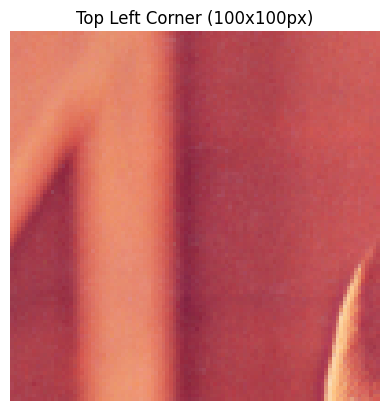

In [ ]:
#Display Image from top left corner 100x100px

image_array = np.array(image_path)
top_left_corner = image_array[:100, :100]

plt.imshow(top_left_corner)
plt.title("Top Left Corner (100x100px)")
plt.axis("off")
plt.show()

**3. Show the three color channels (R, G, B).**


*   Separate the image into its three color channels (Red, Green, and Blue) and display them individually, labeling each channel as R, G, and B. {Using NumPy.}



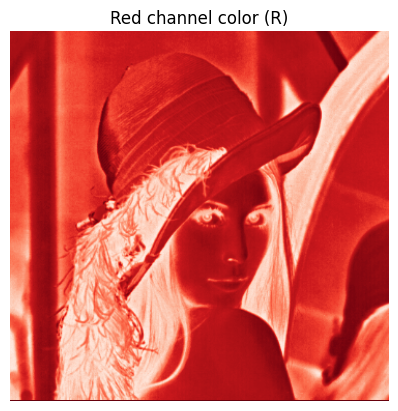

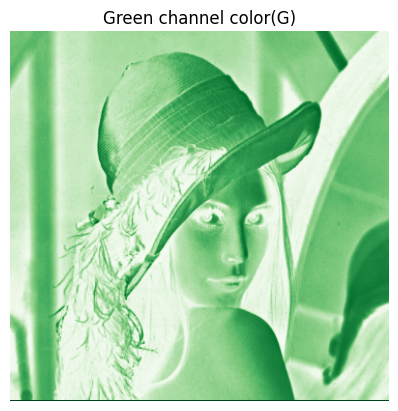

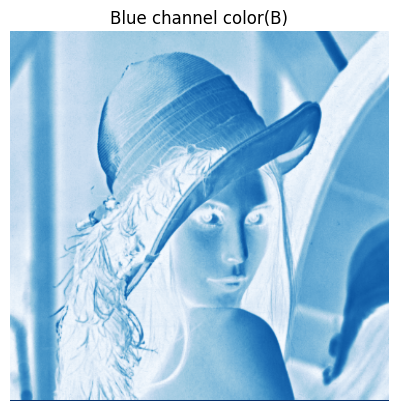

In [ ]:
#Display color channel

#red channel color
red_channel = image_array[:, :, 0]
plt.imshow(red_channel, cmap='Reds')
plt.title("Red channel color (R)")
plt.axis("off")
plt.show()

#green channel color
green_channel = image_array[:, :, 1]
plt.imshow(green_channel, cmap='Greens')
plt.title("Green channel color(G)")
plt.axis("off")
plt.show()

#blue channel color
blue_channel = image_array[:, :, 2]
plt.imshow(green_channel, cmap='Blues')
plt.title("Blue channel color(B)")
plt.axis("off")
plt.show()

**4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:**

*   Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a light gray color), and then display the modified image.

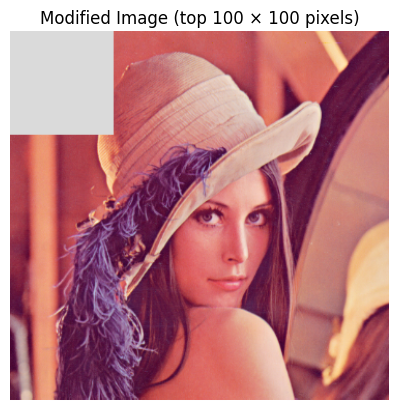

In [ ]:
#modify and display image in light gray

image_array [:100, :100] = 210
modified_image = Image.fromarray(image_array)

plt.imshow(modified_image)
plt.title("Modified Image (top 100 × 100 pixels)")
plt.axis("off")
plt.show()

# Exercise - 2:

**1. Load and display a grayscale image.**

*   Load a grayscale image using the Pillow library.
*   Display the grayscale image using matplotlib.



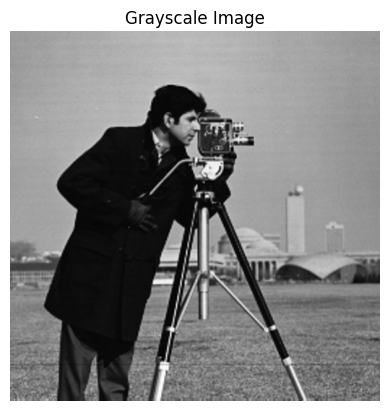

In [ ]:
#load and display grayscale image

image_grayscale = Image.open("/content/drive/MyDrive/AI&ML --- Level 6 /AI&ML---Level6---Worksheet/cameraman.png").convert("L")

plt.imshow(image_grayscale, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

**2. Extract and display the middle section of the image (150 pixels).**


*   Extract a 150 pixel section from the center of the image using NumPy array slicing.
*   Display this cropped image using matplotlib.



(512, 512)


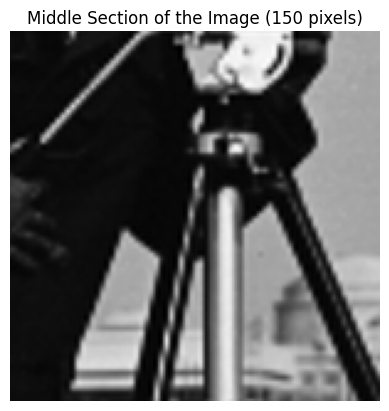

In [ ]:
#display the middle section of the image
image_grayscale_array = np.array(image_grayscale)
height, width = image_grayscale_array.shape
print(image_grayscale_array.shape)

start_row = (height - 150) // 2
start_col = (width - 150) // 2

middle_section = image_grayscale_array[start_row:start_row+150, start_col:start_col+150]

plt.imshow(middle_section, cmap='gray')
plt.title("Middle Section of the Image (150 pixels)")
plt.axis("off")
plt.show()

**3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).**



*   Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values above 100 to 255 (creating a binary image).
*   Display the resulting binary image.



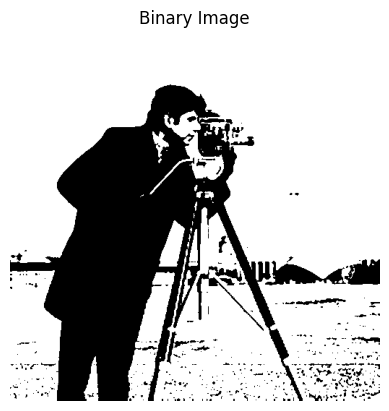

In [ ]:
#applying threshold
threshold_value = np.where(image_grayscale_array < 100,0,255)

plt.imshow(threshold_value,cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

**4. Rotate the image 90 degrees clockwise and display the result.**

*   Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating the image array.
*   Display the rotated image using matplotlib.


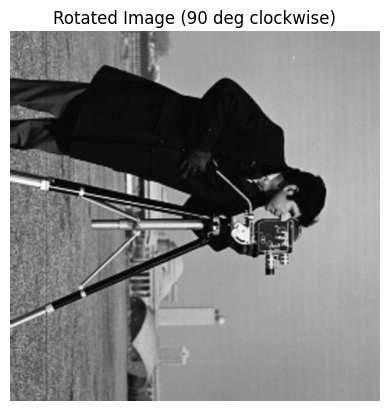

In [ ]:
#Rotating image 90 deg clockwise

rotated_image = image_grayscale.rotate(-90, expand = True)

plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (90 deg clockwise)")
plt.axis("off")
plt.show()

**5. Convert the grayscale image to an RGB image.**

*   Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B).
*   Display the converted RGB image using matplotlib.

RGB


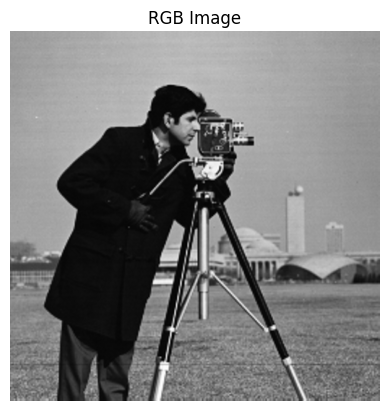

In [ ]:
#Converting grayscale image into RGB

rgb_image = image_grayscale.convert("RGB")

print(rgb_image.mode)
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")
plt.show()

# **Image Compression and Decompression using PCA.**

# Exercise 3:

**1. Load and Prepare Data:**


*   Fetch an image of you choice.{If colour convert to grayscale}
*   Center the dataset - Standaridze the Data.
*   Calculate the covaraince matrix of the Standaridze data.


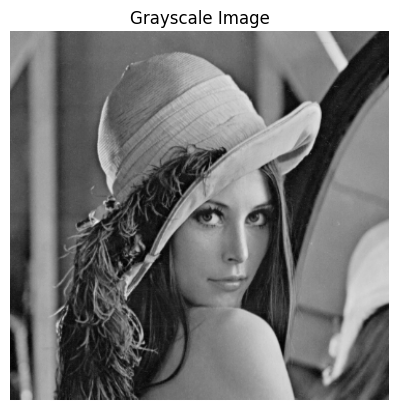

In [ ]:
#Loading Grayscale Image

image_path = Image.open("/content/drive/MyDrive/AI&ML --- Level 6 /AI&ML---Level6---Workshop/lenna_image.png").convert("L")

image_array = np.array(image_path, dtype=np.float64)

plt.imshow(image_array, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [ ]:
#Standarized Data
mean = np.mean(image_array, axis = 0)
standarized_data = image_array - mean

**2. Eigen Decomposition and Identifying Principal Components:**


*   Compute Eigen Values and Eigen Vectors.
*   Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.
*   Identify the Principal Components with the help of cumulative Sum plot.



In [ ]:
#compute PCA
covariance_matrix = np.cov(standarized_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

sorterd_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorterd_indices]
eigenvectors = eigenvectors[:, sorterd_indices]

**3. Reconstruction and Experiment:**

*   Reconstruction: Transform the original data by multiplying it with the selected eigenvectors(PCs) to obtain a lower-dimensional representation.
*   Experiments: Pick Four different combination of principal components with various explained variance value and compare the result.
*   Display the Results and Evaluate.





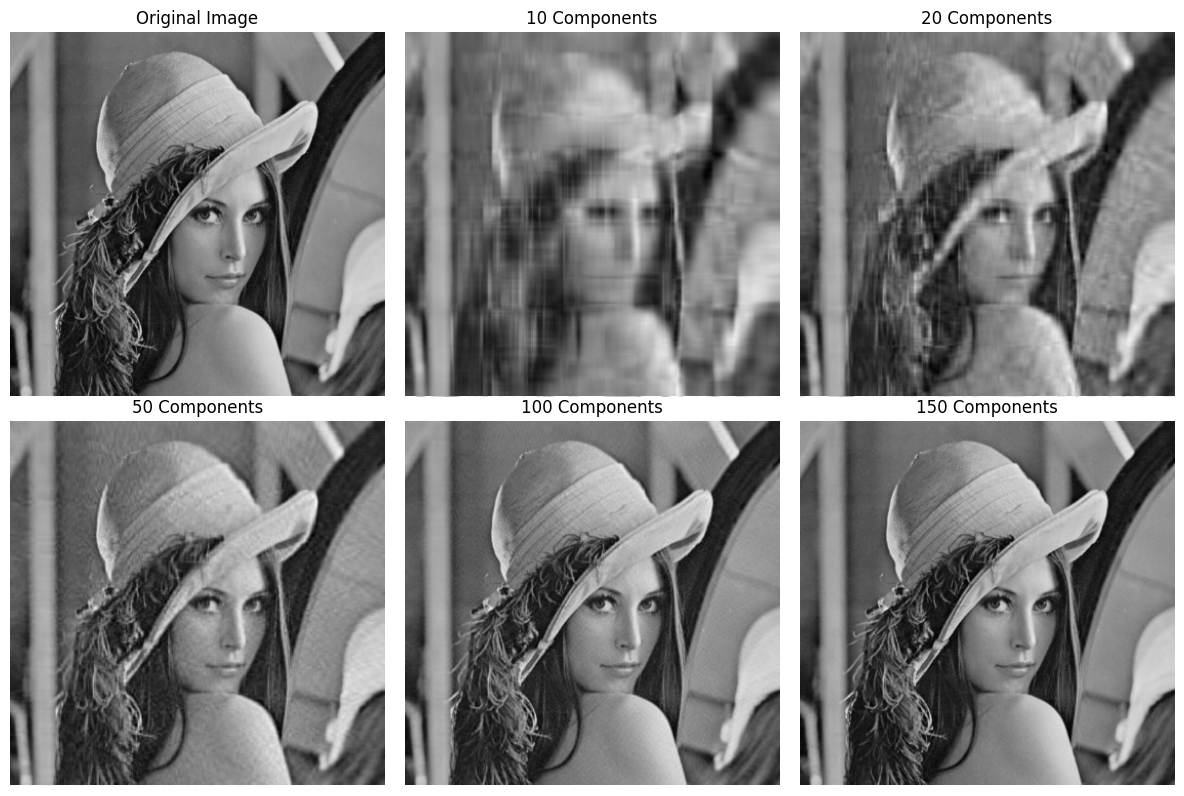

In [ ]:
#Reconstruct Image Function

def reconstruct_image(data, mean, eigenvectors, num_components):
  top_eigenvectors = eigenvectors[:, :num_components]
  reduced_data = np.dot(data, top_eigenvectors)
  reconstructed_data = np.dot(reduced_data, top_eigenvectors.T) + mean
  reconstructed_data = np.clip(reconstructed_data, 0, 255)
  return reconstructed_data

num_components_list = [10, 20, 50, 100, 150]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0, 0].imshow(image_array, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

for i, num_components in enumerate(num_components_list):
  reconstructed_image = reconstruct_image(standarized_data, mean, eigenvectors, num_components)
  ax = axes[(i + 1) // 3, (i + 1) % 3]
  ax.imshow(reconstructed_image, cmap='gray')
  ax.set_title(f"{num_components} Components")
  ax.axis("off")

plt.tight_layout()
plt.show()